# <font color='blue'>FUMEC - Analytics com Python</font>
## **Lista de exercícios 07 - Classificação**

### <font color='red'>ATENÇÃO:<font>
Para salvar o exercício e postar no SINEF, use uma das opções abaixo:

*   **Jupyter Notebook**: opção do menu "File --> Download as --> Notebook (.ipynb)
*   **Google Colaboratory**: opção do menu "File --> Download .ipynb"


Salve o seu arquivo com o nome <font color='red'>**SeuNome_lista07.ipynb**</font>



---

# **Classificação**

## Explorar o problema da classificação, cusando um dataset com informações sobre a composição de vinhos, de acordo com dados abaixo:

#### **Link para o arquivo**

https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

#### **Atributos**

0.  **Classe**: (1, 2, 3) - corresponde à categoria do vinho
1.  alcool 
2.  acidez
3.  ash
4.  alcalinidade  
5.  magnesio
6.  fenois
7.  flavonoides
8.  fenois_nao_flav
9.  proantocianinas
10. cor
11. tonalidade
12. diluicao
13. proline



### **00) Importar as bibliotecas necessárias**

In [2]:
# exercício 00

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

from joblib import dump, load

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **01) Carregar os dados do dataset `wine.data`**

In [3]:
# exercício 01

arquivo = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
cols = ['Zero', 'Um', 'Dois', 'Três', 'Quatro', 'Cinco', 'Seis', 'Sete', 'Oito', 'Nove', 'Dez', 'Onze', 'Doze', 'Treze']

df = pd.read_csv(arquivo, names=cols)
#df.head(10)
df

,Zero,Um,Dois,Três,Quatro,Cinco,Seis,Sete,Oito,Nove,Dez,Onze,Doze,Treze
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### **02) Explorar os dados de diferentes maneiras para comprender melhor o dataset**


In [4]:
# exercício 02

df.describe()

,Zero,Um,Dois,Três,Quatro,Cinco,Seis,Sete,Oito,Nove,Dez,Onze,Doze,Treze
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


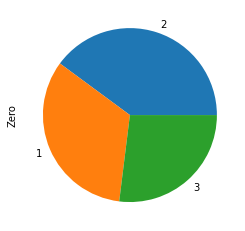

In [5]:
df['Zero'].value_counts().plot(kind='pie');

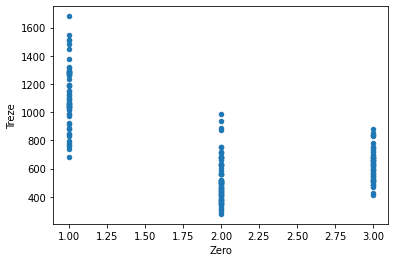

In [11]:
df.plot(kind='scatter', x='Zero', y='Treze')
plt.show()

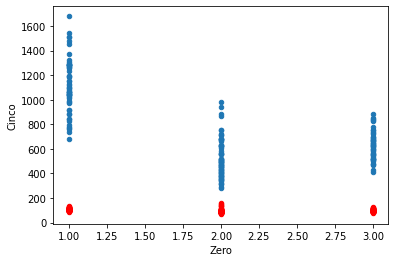

In [10]:
ax = plt.gca()

df.plot(kind='scatter', x='Zero', y='Treze', ax=ax)
df.plot(kind='scatter', x='Zero', y='Cinco', color='red', ax=ax)

plt.show()

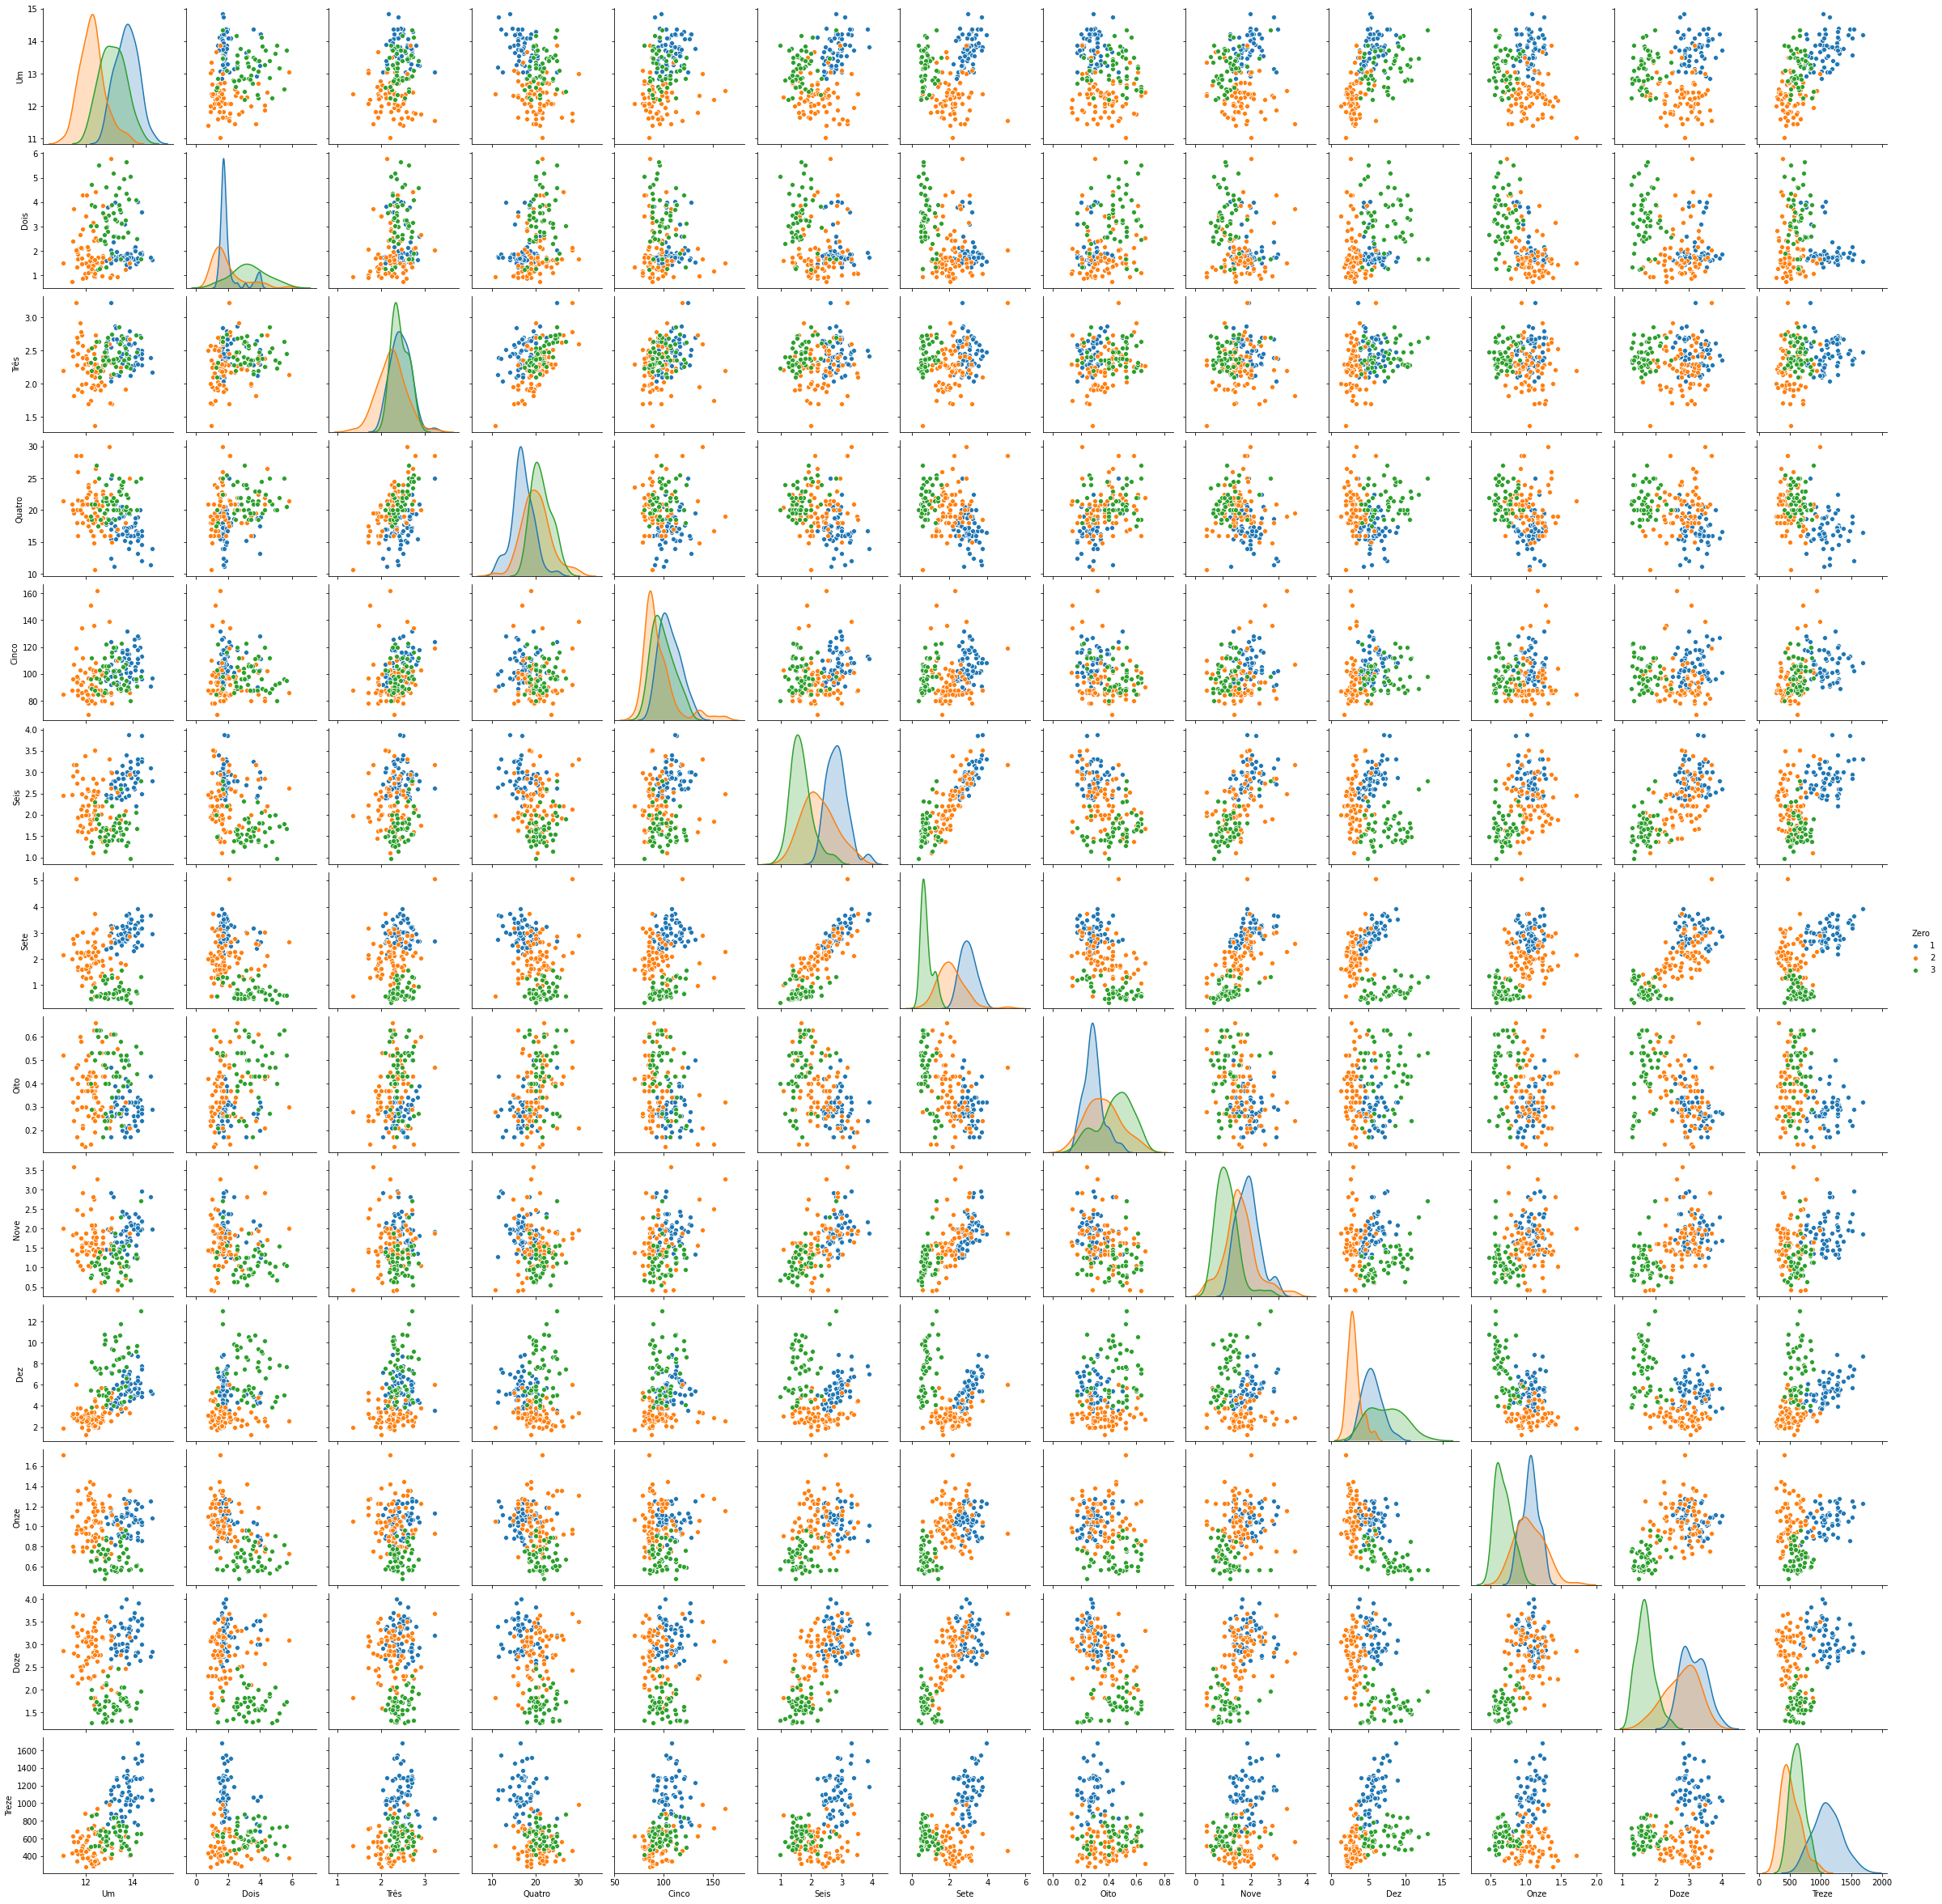

In [9]:
sns.pairplot(df, hue='Zero');

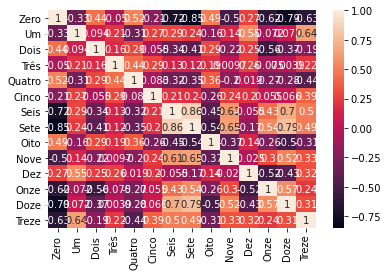

In [12]:
sns.heatmap(df.corr(), annot=True)

### **03) Preparar os dados, gerando os conjuntos de dados para treino e teste**


In [13]:
# exercício 03
df['Zero'].unique()

array([1, 2, 3])

In [0]:
# Transformação
df['Zero_encod'] = df['Zero'].apply(lambda x: 0 if x == 1 else 1 if x == 2 else 2)

In [19]:
# Valores da classe depois da transformação
df['Zero_encod'].unique()

array([0, 1, 2])

### **04) Treinar o classificador**

Você pode escolher qualquer método de classificação

In [20]:
# exercício 04
df.head()

,Zero,Um,Dois,Três,Quatro,Cinco,Seis,Sete,Oito,Nove,Dez,Onze,Doze,Treze,Zero_encod
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [21]:
y = df[['Zero_encod']]
y.head()

,Zero_encod
0,0
1,0
2,0
3,0
4,0


In [22]:
X = df.iloc[:, 0:4]
X.head()

,Zero,Um,Dois,Três
0,1,14.23,1.71,2.43
1,1,13.20,1.78,2.14
2,1,13.16,2.36,2.67
3,1,14.37,1.95,2.50
4,1,13.24,2.59,2.87


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(124, 4)
(54, 4)
(124, 1)
(54, 1)


In [24]:
X_train

,Zero,Um,Dois,Três
143,3,13.62,4.95,2.35
33,1,13.76,1.53,2.70
30,1,13.73,1.50,2.70
34,1,13.51,1.80,2.65
135,3,12.60,2.46,2.20
...,...,...,...,...
82,2,12.08,1.13,2.51
174,3,13.40,3.91,2.48
146,3,13.88,5.04,2.23
74,2,11.96,1.09,2.30


In [25]:
y_train

,Zero_encod
143,2
33,0
30,0
34,0
135,2
...,...
82,1
174,2
146,2
74,1


In [26]:
np.ravel(y_train)

array([2, 0, 0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2, 0, 2, 1, 0, 2, 2, 1, 0,
       1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1, 2, 2, 0, 2, 2, 2,
       0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1,
       0, 0, 0, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1,
       1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1])

In [27]:
m = KNeighborsClassifier()
m.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
classes_preditas = m.predict(X_test.iloc[0:20])

classes_reais = np.ravel(y_test[0:20])

print('Classes preditas:', classes_preditas)
print('Classes reais...:', classes_reais)

Classes preditas: [0 1 0 0 1 2 1 2 0 2 0 1 2 0 2 2 0 0 2 1]
Classes reais...: [0 1 0 0 1 2 1 2 0 2 0 1 2 0 2 2 0 0 2 1]


In [29]:
m.score(X_test, y_test)

1.0

In [30]:
confusion_matrix(y_test, m.predict(X_test))

array([[18,  0,  0],
       [ 0, 21,  0],
       [ 0,  0, 15]])

In [31]:
gnb = GaussianNB()
gnb.fit(X_train, np.ravel(y_train))

print(gnb.score(X_test, y_test),'\n')
confusion_matrix(y_test, gnb.predict(X_test))

1.0 



array([[18,  0,  0],
       [ 0, 21,  0],
       [ 0,  0, 15]])

### **05) Apresentar os resultados do classificador**


In [32]:
# exercício 05
dump(m, 'classifier.dmp')

['classifier.dmp']

In [33]:
modelo = load('classifier.dmp')

print(X_test.head(),'\n')

confusion_matrix(y_test, modelo.predict(X_test))

    Zero     Um  Dois  Três
53     1  13.77  1.90  2.68
64     2  12.17  1.45  2.53
6      1  14.39  1.87  2.45
1      1  13.20  1.78  2.14
98     2  12.37  1.07  2.10 



array([[18,  0,  0],
       [ 0, 21,  0],
       [ 0,  0, 15]])

### <font color='red'>ATENÇÃO:<font>
Para salvar o exercício e postar no SINEF, use uma das opções abaixo:

*   **Jupyter Notebook**: opção do menu "File --> Download as --> Notebook (.ipynb)
*   **Google Colaboratory**: opção do menu "File --> Download .ipynb"


Salve o seu arquivo com o nome <font color='red'>**SeuNome_lista07.ipynb**</font>